Refer folder structure containing image data for two classes, **Cars** and **Bikes**, and must first verify and refer to this structure before implementation. All RGB images from both folders should be loaded, resized to a fixed size, normalized, and converted into one-dimensional feature vectors. Class labels must be assigned, after which the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A logistic regression model is to be implemented from scratch by initializing weights and bias, defining the sigmoid function, performing forward and backward propagation, and updating parameters using gradient descent. The model should be trained for a fixed number of iterations while recording the cost values. Finally, predictions must be generated for both training and testing datasets to compute accuracy, and a cost versus iterations graph should be plotted along with reporting the final training and testing accuracy.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
DATASET_PATH = "transport"
CATEGORIES = ["bike", "cars"]
IMG_SIZE = 64


In [3]:
def load_dataset(base_path, categories, img_size):
    X = []
    Y = []

    for label, category in enumerate(categories):
        folder_path = os.path.join(base_path, category)
        
        # Verify folder exists
        assert os.path.exists(folder_path), f"{folder_path} not found"
        print(f"Loading images from {folder_path}")

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                img = img.resize((img_size, img_size))
                img = np.array(img) / 255.0     # Normalize
                img = img.flatten()             # Convert to 1D vector

                X.append(img)
                Y.append(label)
            except:
                print(f"Skipping corrupted image: {img_path}")

    return np.array(X), np.array(Y)


In [4]:
X, Y = load_dataset(DATASET_PATH, CATEGORIES, IMG_SIZE)

print("Total samples:", X.shape[0])
print("Feature vector size:", X.shape[1])


Loading images from transport/bike
Loading images from transport/cars
Total samples: 785
Feature vector size: 12288


In [5]:
# Shuffle dataset
indices = np.random.permutation(X.shape[0])
X = X[indices]
Y = Y[indices]

# Split
split = int(0.8 * X.shape[0])

X_train = X[:split].T
Y_train = Y[:split].reshape(1, -1)

X_test = X[split:].T
Y_test = Y[split:].reshape(1, -1)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (12288, 628)
Test set shape: (12288, 157)


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [7]:
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


In [8]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))

    # Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost


In [9]:
def optimize(w, b, X, Y, iterations, learning_rate):
    costs = []

    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)

        w -= learning_rate * grads["dw"]
        b -= learning_rate * grads["db"]

        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")

    return w, b, costs


In [10]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [11]:
w, b = initialize_parameters(X_train.shape[0])

w, b, costs = optimize(
    w, b,
    X_train, Y_train,
    iterations=2000,
    learning_rate=0.005
)


Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.8881880501120177
Cost after iteration 200: 0.7935371125377241
Cost after iteration 300: 0.719446274565431
Cost after iteration 400: 0.6635687158924204
Cost after iteration 500: 0.6203832083733476
Cost after iteration 600: 0.5856499822606932
Cost after iteration 700: 0.5566553148339071
Cost after iteration 800: 0.5317029359458297
Cost after iteration 900: 0.5097019287539294
Cost after iteration 1000: 0.48992192155883857
Cost after iteration 1100: 0.4718554820033605
Cost after iteration 1200: 0.4551392238776574
Cost after iteration 1300: 0.4395065784028326
Cost after iteration 1400: 0.42475821701389427
Cost after iteration 1500: 0.41074283027781977
Cost after iteration 1600: 0.3973443564954807
Cost after iteration 1700: 0.3844735614537665
Cost after iteration 1800: 0.3720630375662963
Cost after iteration 1900: 0.3600659131325423


In [12]:
train_pred = predict(w, b, X_train)
test_pred = predict(w, b, X_test)

train_accuracy = 100 - np.mean(np.abs(train_pred - Y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(test_pred - Y_test)) * 100

print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")



Training Accuracy: 87.58%
Testing Accuracy: 71.34%


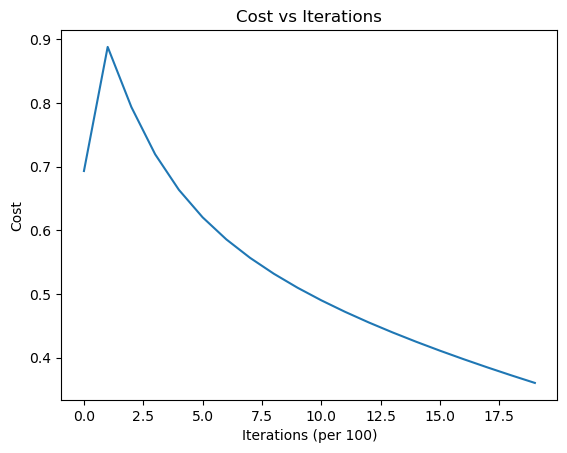

In [13]:
plt.plot(costs)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
